<a href="https://colab.research.google.com/github/nick01as/AI-ML-starter-kit/blob/AshishBamba05-patch-1/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TritonHacks 2025: Introduction to AI/ML Starter Kit

Welcome to the Intro to AI/ML Starter Kit for TritonHacks 2025!

In [1]:
# pip installations

!pip install -q kaggle

In [3]:
# Import Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Create a new file in drive named "AI-ML-StarterKit" and place the downloaded Kaggle dataset in the folder

In [4]:
# Mount Google drive
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/AI-ML-StarterKit/healthcare-dataset-stroke-data.csv')
df.head()

Mounted at /content/drive


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
# Independent And Dependent Variables
df = pd.read_csv('/content/drive/MyDrive/AI-ML-StarterKit/healthcare-dataset-stroke-data.csv')

dependent_var = 'stroke'
independent_vars = [col for col in df.columns if col != dependent_var]

print("Target Output: ", dependent_var)
print("Feature Inputs: ", independent_vars)


Target Output:  stroke
Feature Inputs:  ['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status']


<ipython-input-15-dd60443eb2eb>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stroke_rates = df.groupby('age_group')['stroke'].mean().reset_index()


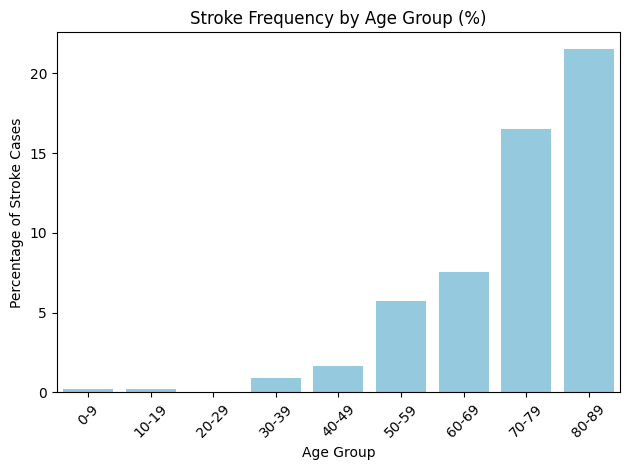

In [15]:
# Age v. Frequency Of Strokes

# Create age bins (0–10, 10–20, ..., 80–90)
bins = range(0, 91, 10)
labels = [f'{i}-{i+9}' for i in bins[:-1]]
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Group by age_group and calculate stroke % per group
stroke_rates = df.groupby('age_group')['stroke'].mean().reset_index()
stroke_rates['stroke_percent'] = stroke_rates['stroke'] * 100

# Plot as bar chart
sns.barplot(data=stroke_rates, x='age_group', y='stroke_percent', color='skyblue')
plt.title('Stroke Frequency by Age Group (%)')
plt.xlabel('Age Group')
plt.ylabel('Percentage of Stroke Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-6-82fba01099ea>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_data, x='gender', y='stroke', palette = 'dark')


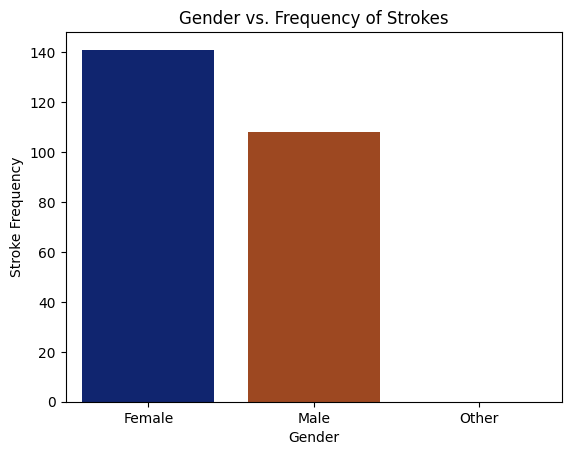

In [6]:
# Gender v. Frequency Of Strokes (Bar Graph)
grouped_data = df.groupby('gender')['stroke'].sum().reset_index()
sns.barplot(data=grouped_data, x='gender', y='stroke', palette = 'dark')
plt.title('Gender vs. Frequency of Strokes')
plt.xlabel('Gender')
plt.ylabel('Stroke Frequency')
plt.show()



<ipython-input-7-a7cf62e1bdf8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_data, x='gender', y='stroke', palette = 'dark')


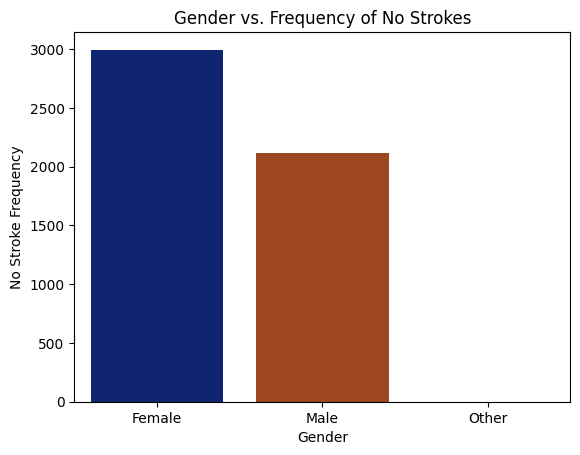

In [7]:
# Gender v. Frequency Of No Strokes (Bar Graph)

grouped_data = df.groupby('gender')['stroke'].count().reset_index()
sns.barplot(data=grouped_data, x='gender', y='stroke', palette = 'dark')
plt.title('Gender vs. Frequency of No Strokes')
plt.xlabel('Gender')
plt.ylabel('No Stroke Frequency')
plt.show()


<ipython-input-8-ff2778f25b3b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='stroke', y='bmi', palette = 'dark')


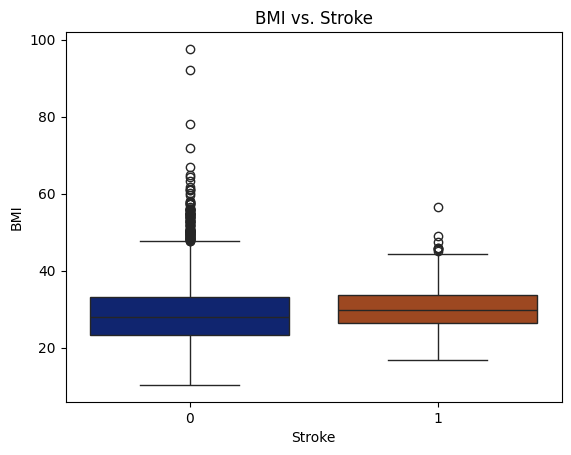

In [8]:
# Boxplot For BMI

sns.boxplot(data=df, x='stroke', y='bmi', palette = 'dark')
plt.title('BMI vs. Stroke')
plt.xlabel('Stroke')
plt.ylabel('BMI')
plt.show()

In [9]:
# One-hot encoding of Work

one_hot = pd.get_dummies(
    df,
    columns=['work_type', 'gender', 'smoking_status', 'Residence_type', 'ever_married'],
    prefix=['work', 'gender', 'smoking', 'Residence', 'marriage']
)
df = one_hot